In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

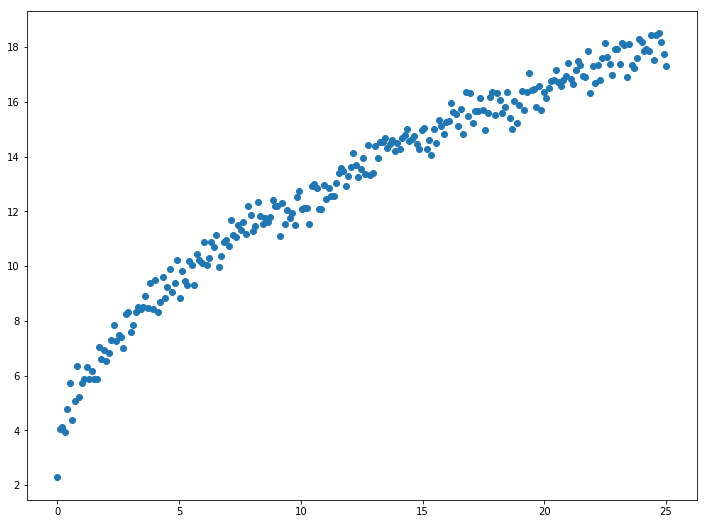

In [2]:
# Simulate data

N = 250
D = 1

X = np.linspace(0, 25, N)
X.shape = (N, D)

y = 2.7 + 3.1*np.sqrt(X) + np.random.randn(N, D)*0.4

plt.figure(figsize = (12,9))
plt.scatter(X, y)

In [3]:
# Functions

def ReLU(X):
    return X * (X > 0)

def feed_forward(X, W1, b1, W2, b2, W3, b3, W4, b4, W5, b5, W6, b6):
    Z1 = ReLU(np.matmul(X, W1) + b1)
    Z2 = Z1.dot(W2) + b2
    Z3 = ReLU(Z2.dot(W3) + b3)
    Z4 = Z3.dot(W4) + b4
    Z5 = ReLU(Z4.dot(W5) + b5)
    y_hat = Z5.dot(W6) + b6
    
    return Z1, Z2, Z3, Z4, Z5, y_hat

def OLS(y, y_hat):
    return np.matmul((y - y_hat).T, y - y_hat)[0, 0]

def r_squared(y, y_hat):
    return 1 - (np.matmul((y - y_hat).T, y - y_hat) / np.matmul((y - y.mean()).T, y - y.mean()))[0, 0]

In [8]:
# Build the Model

Q = 6
R = 1
S = 6
T = 1
U = 6
K = 1

W1 = np.random.randn(D, Q)
b1 = np.random.randn(Q)
W2 = np.random.randn(Q, R)
b2 = np.random.randn(R)
W3 = np.random.randn(R, S)
b3 = np.random.randn(S)
W4 = np.random.randn(S, T)
b4 = np.random.randn(T)
W5 = np.random.randn(T, U)
b5 = np.random.randn(U)
W6 = np.random.randn(U, K)
b6 = np.random.randn(K)

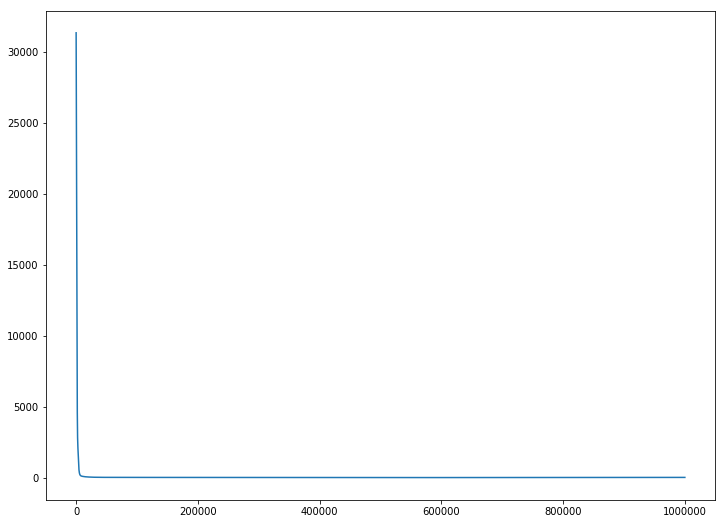

In [9]:
# Train the Model

J = []
eta = 1e-7
epochs = int(1e6)

for t in xrange(epochs):
    Z1, Z2, Z3, Z4, Z5, y_hat = feed_forward(X, W1, b1, W2, b2, W3, b3, W4, b4, W5, b5, W6, b6)
    J.append(OLS(y, y_hat))
    
    dH6 = y_hat - y
    dW6 = np.matmul(Z5.T, dH6)
    W6 -= eta * dW6
    b6 -= eta * dW6.sum(axis = 0)
    
    dZ5 = np.matmul(dH6, W6.T)
    dH5 = dZ5 * (Z5 > 0)
    dW5 = np.matmul(Z4.T, dH5)
    W5 -= eta * dW5
    b5 -= eta * dW5.sum(axis = 0)
    
    dZ4 = np.matmul(dH5, W5.T)
    dH4 = dZ4
    dW4 = np.matmul(Z3.T, dH4)
    W4 -= eta * dW4
    b4 -= eta * dW4.sum(axis = 0)
    
    dZ3 = np.matmul(dH4, W4.T)
    dH3 = dZ3 * (Z3 > 0)
    dW3 = np.matmul(Z2.T, dH3)
    W3 -= eta * dW3
    b3 -= eta * dW3.sum(axis = 0)
    
    dZ2 = np.matmul(dH3, W3.T)
    dH2 = dZ2
    dW2 = np.matmul(Z1.T, dH2)
    W2 -= eta * dW2
    b2 -= eta * dW2.sum(axis = 0)
    
    dZ1 = np.matmul(dH2, W2.T)
    dH1 = dZ1 * (Z1 > 0)
    dW1 = np.matmul(X.T, dH1)
    W1 -= eta * dW1
    b1 -= eta * dW1.sum(axis = 0)
    
plt.figure(figsize = (12, 9))
plt.plot(J)

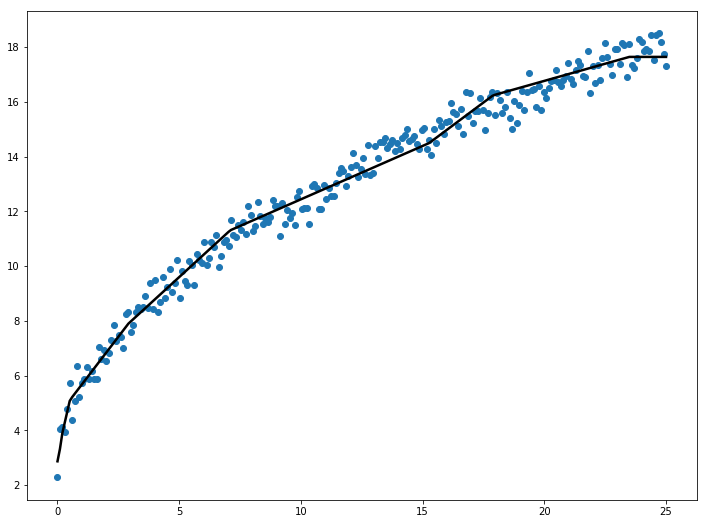

In [10]:
# Visualize Model Fit

plt.figure(figsize = (12, 9))
plt.scatter(X, y)
plt.plot(X, y_hat, color = "black", linewidth = 2.5)

In [11]:
print "R-squared: {}".format(r_squared(y, y_hat))

R-squared: 0.98398825886
